<a href="https://colab.research.google.com/github/myconcordia/COMP478/blob/main/EdgeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Edge Detection**

Image edge detection is a technique in digital image processing that aims to identify the boundaries or edges of objects within an image. The edges correspond to the areas of the image where the intensity or color changes rapidly, and they often provide important information about the structure and content of the image.

There are several methods for detecting edges in an image, but most of them involve some form of gradient calculation. A gradient is a measure of the rate of change of a signal, such as the intensity of an image pixel. The idea behind edge detection is to look for places where the gradient of the image is particularly strong, indicating the presence of an edge.

One common method for edge detection is the Sobel operator, which calculates the gradient of the image using a small convolution kernel. The kernel consists of two parts, one for detecting vertical edges and one for detecting horizontal edges. By convolving the kernel with the image, the Sobel operator can identify the regions where the gradient is highest in both the horizontal and vertical directions, and thus where edges are likely to be located.

Other methods for edge detection include the Canny edge detector, which uses a more complex algorithm to identify edges with high precision, and the Laplacian of Gaussian (LoG) filter, which applies a combination of Gaussian smoothing and Laplacian differentiation to enhance the edges in an image.

**Import Python modules**

In [4]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

The **plt.imshow** function normalizes data so that min(data) gets mapped to 0 and max(data) gets mapped to 1. Then, the colormap (e.g., 'gray', 'jet') is applied. 

**Create a simple image containing a square**

In [5]:
I = np.zeros((512, 512), np.uint8)
I[156:356, 156:356] = 255

In [6]:
#Image size and type
I.shape, I.dtype

((512, 512), dtype('uint8'))

(<matplotlib.image.AxesImage at 0x7f94b84bac10>,
 (-0.5, 511.5, 511.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7f94b83fe3a0>)

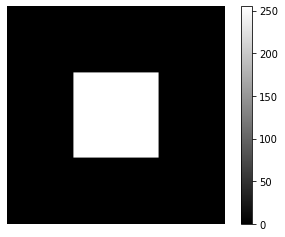

In [7]:
plt.imshow(I,'gray'), plt.axis('off'), plt.colorbar()

**Sobel edge detection with cv2.Sobel**

The output of the Sobel filter is a gradient image that shows the strength and direction of the edges in the original image. High gradient magnitudes correspond to areas of rapid change in intensity, which are likely to be edges. The orientation of the gradient can also be used to distinguish between different types of edges, such as vertical or horizontal edges.

In [ ]:
# Blur the image for better edge detection
I_blur = cv2.GaussianBlur(I, (3,3), 0) 

# Sobel Edge Detection
Sobelx = cv2.Sobel(src=I_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3) # Sobel Edge Detection on the x-axis (dx=1, dy=0)
Sobely = cv2.Sobel(src=I_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the y-axis (dx=0, dy=1)

If our output datatype is cv2.CV_8U, it will make all negative values 0. To prevent this issue, we specify the output to some higher forms such as cv2.CV_64F, and then take the absolute value, followed by converting back to cv2.CV_8U if needed.

The gradient images are now of the floating point data type, so we need to convert them back a to unsigned 8-bit integer representation so other OpenCV functions can operate (i.e. using cv2.convertScaleAbs, which scales, computes absolute values and converts the result to 8-bit)

(<matplotlib.image.AxesImage at 0x7feb44e55f10>,
 (-0.5, 511.5, 511.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7feb44e07b20>)

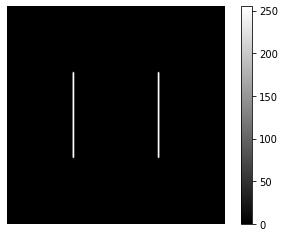

In [ ]:
# Display Sobel Edge Detection Images on the x-axis (vertical edges)
Gx = cv2.convertScaleAbs(Sobelx)
plt.imshow(Gx,'gray'), plt.axis('off'), plt.colorbar()

(<matplotlib.image.AxesImage at 0x7feb44de4790>, (-0.5, 511.5, 511.5, -0.5))

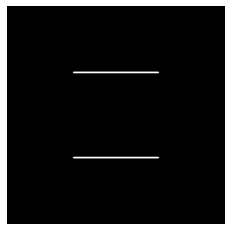

In [ ]:
# Display Sobel Edge Detection Images on the y-axis (horizontal edges)
Gy = cv2.convertScaleAbs(Sobely)
plt.imshow(Gy,'gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7feb44daba90>, (-0.5, 511.5, 511.5, -0.5))

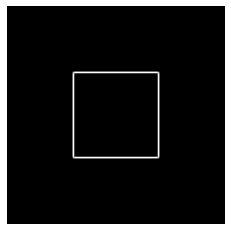

In [ ]:
# Display Gradient Magnitude
G = Gx + Gy
plt.imshow(G,'gray'), plt.axis('off')

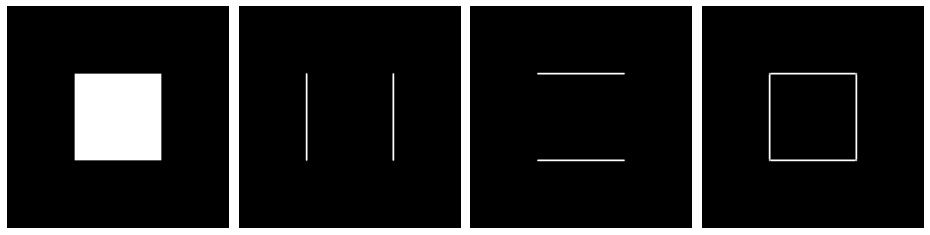

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13))
plt.subplot(141), plt.imshow(I, 'gray'), plt.axis('off')
plt.subplot(142), plt.imshow(Gx,'gray'), plt.axis('off')
plt.subplot(143), plt.imshow(Gy,'gray'), plt.axis('off')
plt.subplot(144), plt.imshow(G,'gray'), plt.axis('off')
plt.tight_layout(pad=1)
plt.show()

**Using PIL to Create a simple image containing a square**

In [ ]:
from PIL import Image

square = np.zeros((512, 512))
square[156:356, 156:356] = 255
I = Image.fromarray(square)
I = I.convert("L")

#Image size and type
I = np.asarray(I)
I.shape, I.dtype

#Display the image
cv2_imshow(I)

**Draw Text**

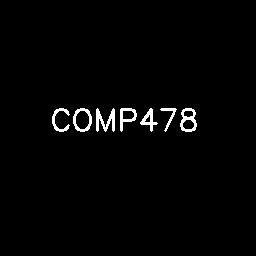

In [ ]:
img = np.zeros((256, 256), np.uint8) 
I = cv2.putText(img, 'COMP478', (50,130), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255), 2)
cv2_imshow(I)

In [ ]:
# Blur the image for better edge detection
I_blur = cv2.GaussianBlur(I, (3,3), 0) 

# Sobel Edge Detection
Sobelx = cv2.Sobel(src=I_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3) # Sobel Edge Detection on the X-axis (dx=1, dy=0)
Sobely = cv2.Sobel(src=I_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the Y-axis (dx=0, dy=1)

(<matplotlib.image.AxesImage at 0x7feb449d8ac0>,
 (-0.5, 255.5, 255.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7feb44993250>)

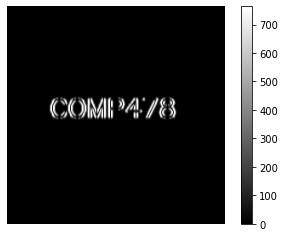

In [ ]:
# Display Sobel Edge Detection Images
Gx = np.abs(Sobelx)
plt.imshow(Gx,'gray'), plt.axis('off'), plt.colorbar()

(<matplotlib.image.AxesImage at 0x7feb449750d0>,
 (-0.5, 255.5, 255.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7feb44920820>)

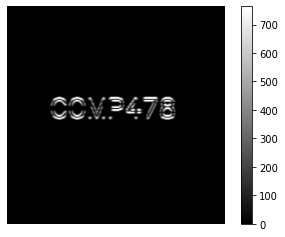

In [ ]:
# Display Sobel Edge Detection Images
Gy = np.abs(Sobely)
plt.imshow(Gy,'gray'), plt.axis('off'), plt.colorbar()

(<matplotlib.image.AxesImage at 0x7feb448fc700>,
 (-0.5, 255.5, 255.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7feb448aae50>)

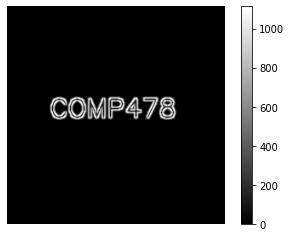

In [ ]:
G = Gx + Gy
plt.imshow(G,'gray'), plt.axis('off'), plt.colorbar()

**Mount Google Drive: First mount and authenticate yourself**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
#Second change your current folder to point working folder My Drive
import os
os.chdir("/content/drive/My Drive/")
os.listdir()

['Colab Notebooks', 'data', 'images', 'trimesh', 'Ericsson', 'amazon']

(<matplotlib.image.AxesImage at 0x7feb4564c7c0>, (-0.5, 639.5, 479.5, -0.5))

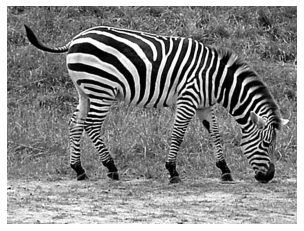

In [ ]:
I = cv2.imread('./images/Zebra.png',0)
# Convert to graycsale
#I = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
plt.imshow(I,'gray'), plt.axis('off')


In [ ]:
# Blur the image for better edge detection
I_blur = cv2.GaussianBlur(I, (3,3), 0) 
 
# Sobel Edge Detection
#  If dx=1 and dy=0, we compute the 1st derivative Sobel image in the x-direction
Sobelx = cv2.Sobel(src=I_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X-axis (dx=1, dy=0)
Sobely = cv2.Sobel(src=I_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y-axis (dx=0, dy=1)

(<matplotlib.image.AxesImage at 0x7feb4595be80>, (-0.5, 639.5, 479.5, -0.5))

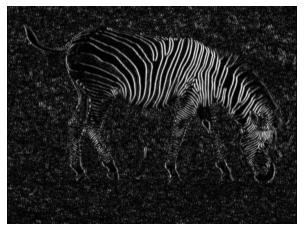

In [ ]:
# Display Sobel Edge Detection Images
Gx = np.abs(Sobelx)
plt.imshow(Gx,'gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7feb58b236d0>, (-0.5, 639.5, 479.5, -0.5))

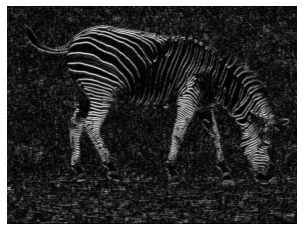

In [ ]:
# Display Sobel Edge Detection Images
Gy = np.abs(Sobely)
plt.imshow(Gy,'gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7feb4c7a73d0>, (-0.5, 639.5, 479.5, -0.5))

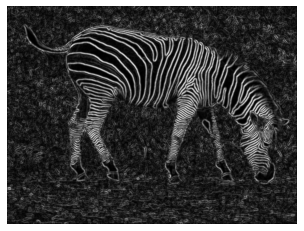

In [ ]:
# Combine the gradient representations into a single image (magnitude)
#G = np.abs(Gx) + np.abs(Gy)
G = cv2.addWeighted(Gx, 0.5, Gy, 0.5, 0)
plt.imshow(G,'gray'), plt.axis('off')

(<matplotlib.image.AxesImage at 0x7feb4c778eb0>, (-0.5, 639.5, 479.5, -0.5))

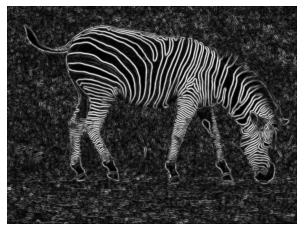

In [ ]:
# Display Gradient Magnitude
G = cv2.magnitude(Sobelx, Sobely)
plt.imshow(G,'gray'), plt.axis('off')

**Sobel edge detection with Filter2D in OpenCV**

In [ ]:
I = cv2.imread('./images/Zebra.png')
I_gray = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
k = 5
I_blur = cv2.bilateralFilter(I_gray, k, k * 2, k / 2) # To perserve edges

# 3x3 sobel filters for edge detection
sobel_x = np.array([[ -1, 0, 1], 
                    [ -2, 0, 2], 
                    [ -1, 0, 1]])
                    
sobel_y = np.array([[ -1, -2, -1], 
                    [  0,  0,  0], 
                    [  1,  2,  1]])

# Filter the blurred grayscale images using filter2D
Sobelx = cv2.filter2D(I_blur, cv2.CV_64F, sobel_x)  
Sobely = cv2.filter2D(I_blur, cv2.CV_64F, sobel_y)


(<matplotlib.image.AxesImage at 0x7feb455308b0>,
 (-0.5, 639.5, 479.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7feb454eb100>)

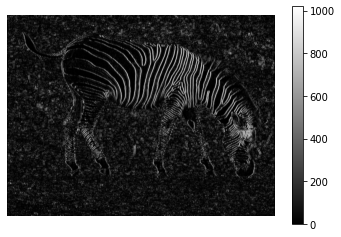

In [ ]:
# Display Sobel Edge Detection Images
Gx = np.abs(Sobelx)
#Gx = cv2.convertScaleAbs(Sobelx)
plt.imshow(Gx,'gray'), plt.axis('off'), plt.colorbar()

(<matplotlib.image.AxesImage at 0x7feb452edaf0>,
 (-0.5, 639.5, 479.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7feb452a7280>)

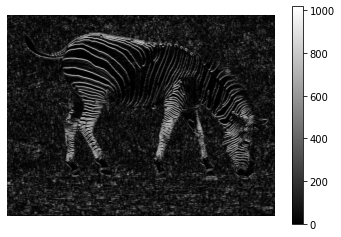

In [ ]:
Gy = np.abs(Sobely)
#Gy = cv2.convertScaleAbs(Sobely)
plt.imshow(Gy,'gray'), plt.axis('off'), plt.colorbar()

(<matplotlib.image.AxesImage at 0x7feb45403fa0>,
 (-0.5, 639.5, 479.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7feb4543b730>)

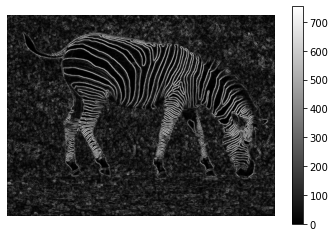

In [ ]:
# Combine the gradient representations into a single image (magnitude)
#G = np.abs(Gx) + np.abs(Gy)
G = cv2.addWeighted(Gx, 0.5, Gy, 0.5, 0)
plt.imshow(G,'gray'), plt.axis('off'), plt.colorbar()

(<matplotlib.image.AxesImage at 0x7feb45183070>,
 (-0.5, 639.5, 479.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7feb451b8c10>)

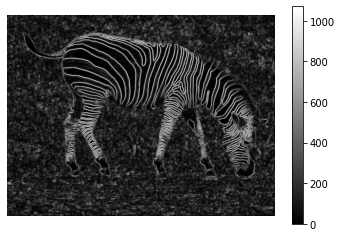

In [ ]:
#Gradient magnitude
G = cv2.magnitude(Sobelx, Sobely) 
#G = cv2.convertScaleAbs(G)
plt.imshow(G,'gray'), plt.axis('off'), plt.colorbar()

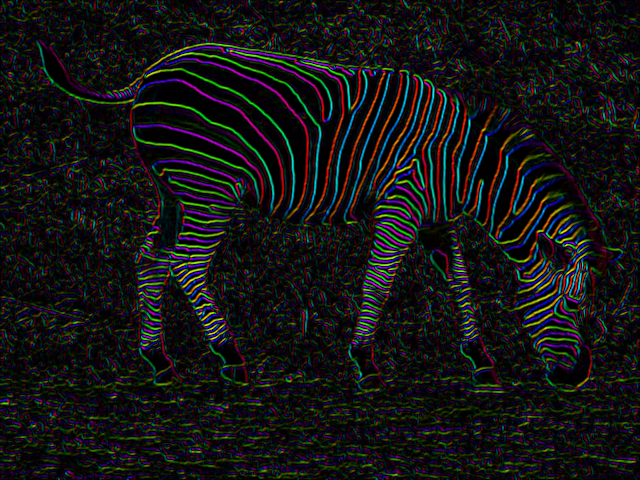

In [ ]:
#Compute and display the gradient orientation
orien = cv2.phase(Sobelx, Sobely, angleInDegrees=True)
orien = orien / 2. # Go from 0:360 to 0:180 
hsv = np.zeros_like(I)
hsv[..., 0] = orien # H (in OpenCV between 0:180)
hsv[..., 1] = 255 # S
hsv[..., 2] = cv2.normalize(G, None, 0, 255, cv2.NORM_MINMAX) # V 0:255

bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
cv2_imshow(bgr)

(<matplotlib.image.AxesImage at 0x7feb450a4220>,
 (-0.5, 639.5, 479.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7feb4504bdf0>)

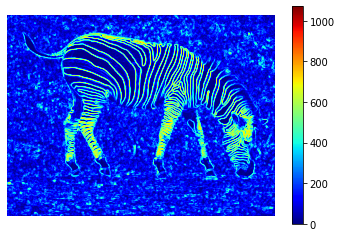

In [ ]:
# Compute the gradient magnitude (alternative solution)
magnitude = np.sqrt((Sobelx ** 2) + (Sobely ** 2))
#magnitude = cv2.convertScaleAbs(magnitude)
plt.imshow(magnitude,'jet'), plt.axis('off'), plt.colorbar()

Using the Jet colormap, values that are closer to the blue range are very small. Values that are closer to the yellow/red range are quite large (relative to the rest of the values). Taking a look at the outlines/borders of the stripes we can see that these pixels have a large gradient magnitude due to the fact that they contain edge information.

(<matplotlib.image.AxesImage at 0x7feb45029a90>,
 (-0.5, 639.5, 479.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7feb44fdd6a0>)

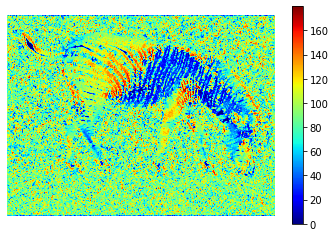

In [ ]:
# Compute the gradient orientation (alternative solution)
orientation = np.arctan2(Sobely, Sobelx) * (180 / np.pi) % 180
#orientation = cv2.convertScaleAbs(orientation)
plt.imshow(orientation,'jet'), plt.axis('off'), plt.colorbar()

The orientation values fall into the range [0, 180], where values closer to zero shown as blue and values closer to 180 as red. 

**Example: Draw digits**

In [ ]:
# Draw the digit 7 on 30x40 grayscale image:
width, height = 30, 40
img = np.full((height, width), 60, np.uint8)
cv2.putText(img, '7', (width//2-10, height//2+10), cv2.FONT_HERSHEY_DUPLEX, 1, 255, 2)
#np.savetxt('img.txt', img, fmt='%3d')
cv2_imshow(img)

**Sobel filter example**

In [24]:
I = np.array([[0, 0, 10, 10, 10], [0, 0, 10, 10, 10], [0, 0, 10, 10, 10], [0, 0, 10, 10, 10], [0, 0, 10, 10, 10]])
I = np.uint8(I)
# 3x3 sobel filters for edge detection
sobel_x = np.array([[ -1, 0, 1], 
                    [ -2, 0, 2], 
                    [ -1, 0, 1]])
                    
sobel_y = np.array([[ -1, -2, -1], 
                    [  0,  0,  0], 
                    [  1,  2,  1]])

# Filter the blurred grayscale images using filter2D with zero-padding
Sobelx = cv2.filter2D(I, cv2.CV_64F, sobel_x, borderType=cv2.BORDER_CONSTANT)  
Sobely = cv2.filter2D(I, cv2.CV_64F, sobel_y, borderType=cv2.BORDER_CONSTANT)

(<matplotlib.image.AxesImage at 0x7f94b6da4a90>,
 (-0.5, 4.5, 4.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7f94b6d5a220>)

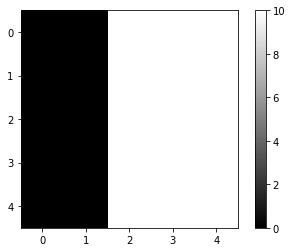

In [25]:
#I = np.uint8(I)
plt.imshow(I,'gray'), plt.axis('on'), plt.colorbar()

In [26]:
print(Sobelx)

[[  0.  30.  30.   0. -30.]
 [  0.  40.  40.   0. -40.]
 [  0.  40.  40.   0. -40.]
 [  0.  40.  40.   0. -40.]
 [  0.  30.  30.   0. -30.]]


In [27]:
print(Sobely)

[[  0.  10.  30.  40.  30.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.]
 [  0. -10. -30. -40. -30.]]


(<matplotlib.image.AxesImage at 0x7f94b6cb6c10>,
 (-0.5, 4.5, 4.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7f94b6c6f3a0>)

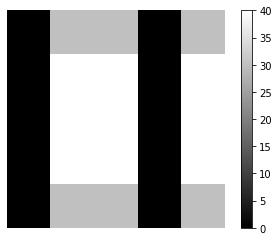

In [28]:
# Display Sobel Edge Detection Images on the x-axis (vertical edges)
#Gx = np.abs(Sobelx)
Gx = cv2.convertScaleAbs(Sobelx)
plt.imshow(Gx,'gray'), plt.axis('off'), plt.colorbar()

(<matplotlib.image.AxesImage at 0x7f94b6c4f130>,
 (-0.5, 4.5, 4.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7f94b6bfa880>)

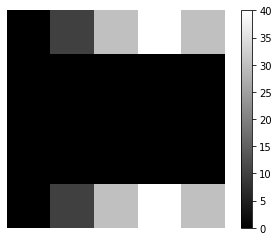

In [29]:
# Display Sobel Edge Detection Images on the y-axis (horizontal edges)
#Gy = np.abs(Sobely)
Gy = cv2.convertScaleAbs(Sobely)
plt.imshow(Gy,'gray'), plt.axis('off'), plt.colorbar()

(<matplotlib.image.AxesImage at 0x7f94b6bdb610>, (-0.5, 4.5, 4.5, -0.5))

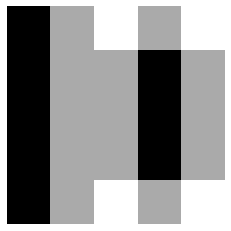

In [30]:
# Display Gradient Magnitude
G = Gx + Gy
plt.imshow(G,'gray'), plt.axis('off')

**Using border values to pad the image (default)**

In [31]:
I = np.array([[0, 0, 10, 10, 10], [0, 0, 10, 10, 10], [0, 0, 10, 10, 10], [0, 0, 10, 10, 10], [0, 0, 10, 10, 10]])
I = np.uint8(I)
# 3x3 sobel filters for edge detection
sobel_x = np.array([[ -1, 0, 1], 
                    [ -2, 0, 2], 
                    [ -1, 0, 1]])
                    
sobel_y = np.array([[ -1, -2, -1], 
                    [  0,  0,  0], 
                    [  1,  2,  1]])

# Filter the blurred grayscale images using filter2D with border values to pad the image (default).
Sobelx = cv2.filter2D(I, cv2.CV_64F, sobel_x)  
Sobely = cv2.filter2D(I, cv2.CV_64F, sobel_y)

(<matplotlib.image.AxesImage at 0x7f94b6ba3a90>,
 (-0.5, 4.5, 4.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7f94b6b59220>)

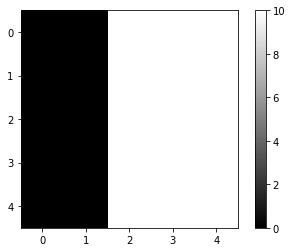

In [32]:
plt.imshow(I,'gray'), plt.axis('on'), plt.colorbar()

In [33]:
print(Sobelx)

[[ 0. 40. 40.  0.  0.]
 [ 0. 40. 40.  0.  0.]
 [ 0. 40. 40.  0.  0.]
 [ 0. 40. 40.  0.  0.]
 [ 0. 40. 40.  0.  0.]]


In [34]:
print(Sobely)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


(<matplotlib.image.AxesImage at 0x7f94b6f00e50>,
 (-0.5, 4.5, 4.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7f94b6d4f910>)

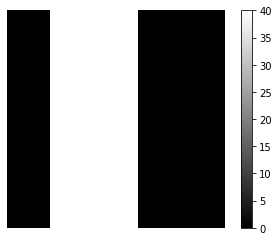

In [35]:
# Display Sobel Edge Detection Images on the x-axis (vertical edges)
#Gx = np.abs(Sobelx)
Gx = cv2.convertScaleAbs(Sobelx)
plt.imshow(Gx,'gray'), plt.axis('off'), plt.colorbar()

(<matplotlib.image.AxesImage at 0x7f94b676b9d0>,
 (-0.5, 4.5, 4.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7f94b6723160>)

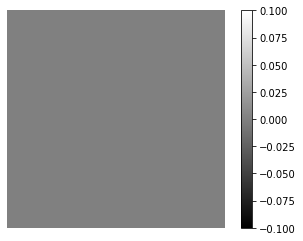

In [43]:
# Display Sobel Edge Detection Images on the y-axis (horizontal edges)
#Gy = np.abs(Sobely)
Gy = cv2.convertScaleAbs(Sobely)
plt.imshow(Gy,'gray'), plt.axis('off'), plt.colorbar()

(<matplotlib.image.AxesImage at 0x7f94b65743d0>, (-0.5, 4.5, 4.5, -0.5))

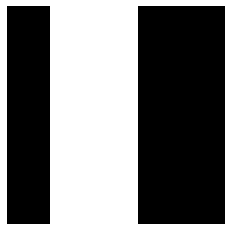

In [45]:
# Display Gradient Magnitude
G = Gx + Gy
plt.imshow(G,'gray'), plt.axis('off')

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


(<matplotlib.image.AxesImage at 0x7f94b6a05ee0>,
 (-0.5, 4.5, 4.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7f94b68b4760>)

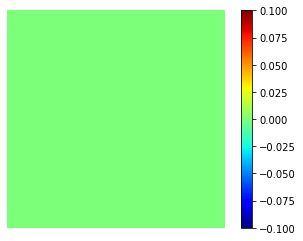

In [48]:
# Compute the gradient orientation
orientation = np.arctan2(Sobely, Sobelx) * (180 / np.pi) % 180
print(orientation)

#orientation = cv2.convertScaleAbs(orientation)
plt.imshow(orientation,'jet'), plt.axis('off'), plt.colorbar()


**Another Sobel edge detection example**

In [49]:
I = np.array([[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [10, 10, 10, 10, 10], [10, 10, 10, 10, 10], [10, 10, 10, 10, 10]])
I = np.uint8(I)
# 3x3 sobel filters for edge detection
sobel_x = np.array([[ -1, 0, 1], 
                    [ -2, 0, 2], 
                    [ -1, 0, 1]])
                    
sobel_y = np.array([[ -1, -2, -1], 
                    [  0,  0,  0], 
                    [  1,  2,  1]])

# Filter the grayscale images using filter2D with with border values to pad the image (default).
Sobelx = cv2.filter2D(I, cv2.CV_64F, sobel_x)  
Sobely = cv2.filter2D(I, cv2.CV_64F, sobel_y)

(<matplotlib.image.AxesImage at 0x7feb3f416430>,
 (-0.5, 4.5, 4.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7feb3f3c8100>)

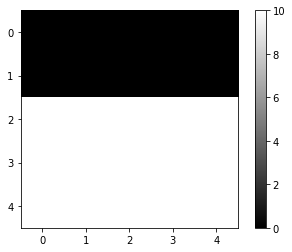

In [ ]:
plt.imshow(I,'gray'), plt.axis('on'), plt.colorbar()

In [ ]:
print(Sobelx)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [50]:
print(Sobely)

[[ 0.  0.  0.  0.  0.]
 [40. 40. 40. 40. 40.]
 [40. 40. 40. 40. 40.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


(<matplotlib.image.AxesImage at 0x7f94b650b8b0>,
 (-0.5, 4.5, 4.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7f94b645c970>)

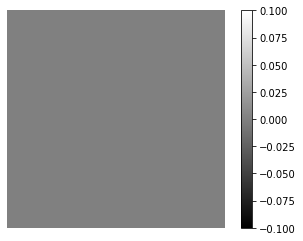

In [51]:
# Display Sobel Edge Detection Images on the x-axis (vertical edges)
#Gx = np.abs(Sobelx)
Gx = cv2.convertScaleAbs(Sobelx)
plt.imshow(Gx,'gray'), plt.axis('off'), plt.colorbar()

(<matplotlib.image.AxesImage at 0x7f94b63bf700>,
 (-0.5, 4.5, 4.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7f94b63ebe50>)

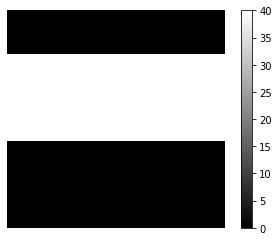

In [52]:
# Display Sobel Edge Detection Images on the y-axis (horizontal edges)
#Gy = np.abs(Sobely)
Gy = cv2.convertScaleAbs(Sobely)
plt.imshow(Gy,'gray'), plt.axis('off'), plt.colorbar()

(<matplotlib.image.AxesImage at 0x7f94b634cb50>, (-0.5, 4.5, 4.5, -0.5))

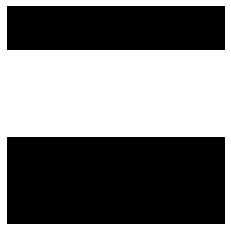

In [53]:
# Display Gradient Magnitude
G = Gx + Gy
plt.imshow(G,'gray'), plt.axis('off')

[[ 0.  0.  0.  0.  0.]
 [90. 90. 90. 90. 90.]
 [90. 90. 90. 90. 90.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


(<matplotlib.image.AxesImage at 0x7f94b63193d0>,
 (-0.5, 4.5, 4.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7f94b62c6b50>)

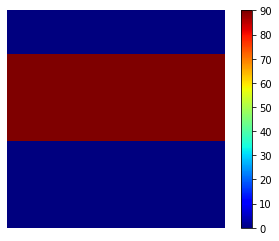

In [54]:
# Compute the gradient orientation (alternative solution)
orientation = np.arctan2(Sobely, Sobelx) * (180 / np.pi) % 180
print(orientation)

#orientation = cv2.convertScaleAbs(orientation)
plt.imshow(orientation,'jet'), plt.axis('off'), plt.colorbar()

**Another Sobel edge detection example**

In [55]:
I = np.array([[0, 0, 0, 0, 10], [0, 0, 0, 10, 10], [0, 0, 10, 10, 10], [0, 10, 10, 10, 10], [10, 10, 10, 10, 10]])
I = np.uint8(I)
# 3x3 sobel filters for edge detection
sobel_x = np.array([[ -1, 0, 1], 
                    [ -2, 0, 2], 
                    [ -1, 0, 1]])
                    
sobel_y = np.array([[ -1, -2, -1], 
                    [  0,  0,  0], 
                    [  1,  2,  1]])

# Filter the grayscale images using filter2D with border values to pad the image (default).
Sobelx = cv2.filter2D(I, cv2.CV_64F, sobel_x)  
Sobely = cv2.filter2D(I, cv2.CV_64F, sobel_y)

(<matplotlib.image.AxesImage at 0x7f94b62aabb0>,
 (-0.5, 4.5, 4.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7f94b625f340>)

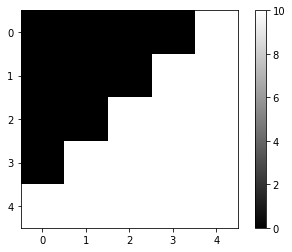

In [56]:
plt.imshow(I,'gray'), plt.axis('on'), plt.colorbar()

In [57]:
print(Sobelx)

[[ 0.  0. 20. 40.  0.]
 [ 0. 10. 30. 30.  0.]
 [ 0. 30. 30. 10.  0.]
 [ 0. 30. 10.  0.  0.]
 [ 0. 20.  0.  0.  0.]]


In [58]:
print(Sobely)

[[ 0.  0.  0.  0.  0.]
 [ 0. 10. 30. 30. 20.]
 [20. 30. 30. 10.  0.]
 [40. 30. 10.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


(<matplotlib.image.AxesImage at 0x7f94b61bed00>,
 (-0.5, 4.5, 4.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7f94b6177490>)

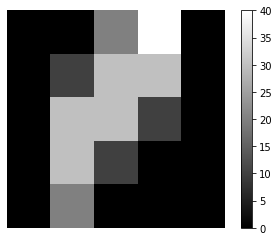

In [59]:
# Display Sobel Edge Detection Images on the x-axis (vertical edges)
#Gx = np.abs(Sobelx)
Gx = cv2.convertScaleAbs(Sobelx)
plt.imshow(Gx,'gray'), plt.axis('off'), plt.colorbar()

(<matplotlib.image.AxesImage at 0x7f94b6159250>,
 (-0.5, 4.5, 4.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7f94b61039a0>)

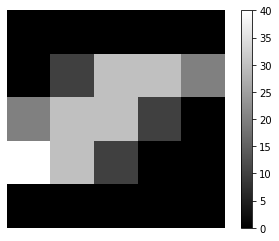

In [60]:
# Display Sobel Edge Detection Images on the y-axis (horizontal edges)
#Gy = np.abs(Sobely)
Gy = cv2.convertScaleAbs(Sobely)
plt.imshow(Gy,'gray'), plt.axis('off'), plt.colorbar()

(<matplotlib.image.AxesImage at 0x7f94b60e66a0>, (-0.5, 4.5, 4.5, -0.5))

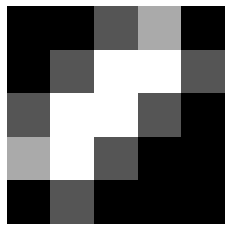

In [61]:
# Display Gradient Magnitude
G = Gx + Gy
plt.imshow(G,'gray'), plt.axis('off')

[[ 0.  0.  0.  0.  0.]
 [ 0. 45. 45. 45. 90.]
 [90. 45. 45. 45.  0.]
 [90. 45. 45.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


(<matplotlib.image.AxesImage at 0x7f94b60a6ee0>,
 (-0.5, 4.5, 4.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7f94b605e670>)

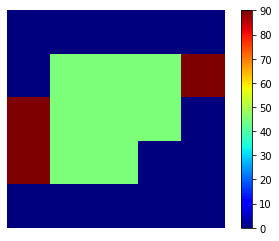

In [62]:
# Compute the gradient orientation (alternative solution)
orientation = np.arctan2(Sobely, Sobelx) * (180 / np.pi) % 180
print(orientation)

#orientation = cv2.convertScaleAbs(orientation)
plt.imshow(orientation,'jet'), plt.axis('off'), plt.colorbar()

**Laplacian filter**

In [107]:
I = np.array([[0, 0, 0, 0, 10], [0, 0, 0, 10, 10], [0, 0, 10, 10, 10], [0, 10, 10, 10, 10], [10, 10, 10, 10, 10]])
I = np.uint8(I)

# Laplacian kernel
w = np.array([[ 0, 1, 0], 
              [ 1, -4, 1], 
              [ 0, 1, 0]])                  

# Filter the grayscale image using filter2D with with border values to pad the image (default).
L = cv2.filter2D(I, cv2.CV_64F, w)  
print(L)

[[  0.   0.   0.  30. -20.]
 [  0.   0.  20. -20.   0.]
 [  0.  20. -20.   0.   0.]
 [ 30. -20.   0.   0.   0.]
 [-20.   0.   0.   0.   0.]]


In [108]:
#Alternative way
L = cv2.Laplacian(I, cv2.CV_64F)  
print(L)

[[  0.   0.   0.  30. -20.]
 [  0.   0.  20. -20.   0.]
 [  0.  20. -20.   0.   0.]
 [ 30. -20.   0.   0.   0.]
 [-20.   0.   0.   0.   0.]]


In [103]:
print(cv2.convertScaleAbs(L))

[[ 0  0  0 30 20]
 [ 0  0 20 20  0]
 [ 0 20 20  0  0]
 [30 20  0  0  0]
 [20  0  0  0  0]]


(<matplotlib.image.AxesImage at 0x7f94b5c27d90>,
 (-0.5, 4.5, 4.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7f94b5bdd520>)

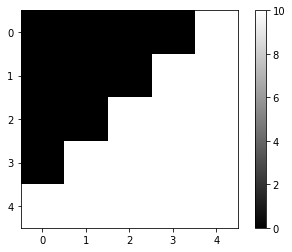

In [109]:
plt.imshow(I,'gray'), plt.axis('on'), plt.colorbar()

(<matplotlib.image.AxesImage at 0x7f94b5b37dc0>,
 (-0.5, 4.5, 4.5, -0.5),
 <matplotlib.colorbar.Colorbar at 0x7f94b5aef550>)

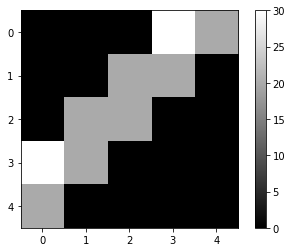

In [110]:
plt.imshow(cv2.convertScaleAbs(L),'gray'), plt.axis('on'), plt.colorbar()